# <font color='#6a5acd'>Statistical Analysis with Python - Guiding Notebook</font>

## <font color='#2F4F4F'>1. Defining the Question</font>

### a) Specifying the Data Analysis Question

Determining the main factors that can help determine the number of total children ever born by a woman of reproductive age in Kenya

### b) Defining the Metric for Success

we will have succeeded if we get relate our observations to reproductive age.

### c) Understanding the context 

The background information surrounding the problem or research question.

### d) Recording the Experimental Design

1.load the libraries and dataset.

2.selecting the relevant columns

3.deal with null values and duplicates

4.calculate the mean,median and mode of the columns

5.plot a bar graph,box plot,scatter plot of the data


### e) Data Relevance

The dataset was relevant to answering the question

## <font color='#2F4F4F'>2. Data Cleaning & Analysis</font>

In [ ]:
# loading libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# loading the main data set
# kdhs2014 = pd.read_csv('kdhs2014_childfile.csv')
kdhs2014 = pd.read_csv('https://bit.ly/khds_dataset')
kdhs2014.head(5)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (47,71,89,123,125,133,135,136,145,146,147,148,203,206,291,292,293,294,295,296,297,298,299,300,301,343,344,392,413,430,439,449,450,451,453,461,463,468,502,517,549,551,553,554,578,664,668,672,676,684,691,817,821,838,849,850,851,852,882,883,884,885,886,887,888,889,890,891,892,893,904,905,912,914,929,933,934,935,936,979,980,981,1007,1008,1009,1010,1011,1021,1022,1023) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,CASEID,MIDX,V000,V001,V002,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012,V013,V014,V015,V016,V017,V018,V019,V019A,V020,V021,V022,V023,V024,V025,V026,V027,V028,V029,V030,V031,V032,V034,V040,V042,...,SYPN1,SPN2,SDPN2,SMPN2,SYPN2,SPN3,SDPN3,SMPN3,SYPN3,SRV1,SDRV1,SMRV1,SYRV1,SRV2,SDRV2,SMRV2,SYRV2,SYF,SDYF,SMYF,SYYF,SAMZ,SDAMZ,SMAMZ,SYAMZ,S521BA,S521BB,S521BC,S521BD,S521BE,S521BX,S539AA,S539AB,S539AC,S539AD,S539AE,S539AF,S539AG,S539AY,S522C
0,1,0001019 02,1,KE6,1,19,2,1,5476381,8,2014,1376,8,1991,1100,23,20-24,Month and year - information complete,Completed,19,1309,13,68,2,All woman sample,1,1,1,Nairobi,Urban,NaN,1,178,7,175,177,6.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,0001019 03,1,KE6,1,19,3,1,5476381,8,2014,1376,2,1991,1094,23,20-24,Month and year - information complete,Completed,31,1309,13,68,2,All woman sample,1,1,1,Nairobi,Urban,NaN,3,178,7,175,177,6.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,0001033 02,1,KE6,1,33,2,1,5476381,8,2014,1376,8,1988,1064,26,25-29,Month and year - information complete,Completed,19,1309,13,68,2,All woman sample,1,1,1,Nairobi,Urban,NaN,1,179,7,175,177,6.0,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,0001033 02,2,KE6,1,33,2,1,5476381,8,2014,1376,8,1988,1064,26,25-29,Month and year - information complete,Completed,19,1309,13,68,2,All woman sample,1,1,1,Nairobi,Urban,NaN,1,179,7,175,177,6.0,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,0001037 02,1,KE6,1,37,2,1,5476381,8,2014,1376,2,1992,1106,22,20-24,Month and year - information complete,Completed,19,1309,13,68,2,All woman sample,1,1,1,Nairobi,Urban,NaN,1,178,7,175,177,6.0,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# selecting only the relevant columns
df = kdhs2014[['CASEID', 'V010', 'V012', 'V025', 'V024', 'V106', 'V152', 'V201']]
df.head()

,CASEID,V010,V012,V025,V024,V106,V152,V201
0,0001019 02,1991,23,Urban,Nairobi,Secondary,52.0,2
1,0001019 03,1991,23,Urban,Nairobi,Secondary,52.0,1
2,0001033 02,1988,26,Urban,Nairobi,Secondary,27.0,2
3,0001033 02,1988,26,Urban,Nairobi,Secondary,27.0,2
4,0001037 02,1992,22,Urban,Nairobi,Primary,29.0,3


In [ ]:
df.dtypes

CASEID     object
V010        int64
V012        int64
V025       object
V024       object
V106       object
V152      float64
V201        int64
dtype: object

In [ ]:
# finding and dealing with null values
df.isnull().any()

CASEID    False
V010      False
V012      False
V025      False
V024      False
V106      False
V152       True
V201      False
dtype: bool

In [ ]:
df['V152'].fillna(value=df['V152'].mean(),inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [ ]:
df.isnull().any()

CASEID    False
V010      False
V012      False
V025      False
V024      False
V106      False
V152      False
V201      False
dtype: bool

In [ ]:
# performing data conversion
df['V152'] = df['V152'].astype(int).round()
df.dtypes

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


CASEID    object
V010       int64
V012       int64
V025      object
V024      object
V106      object
V152       int64
V201       int64
dtype: object

In [ ]:
# dropping duplicates, if any
df = df.drop_duplicates()

In [ ]:
# checking for the shape of the dataset
df.shape

(14949, 8)

In [ ]:
# calculating the mean, median, and mode of the V012 variable

df['V012'].mean()

28.878988561107768

In [ ]:
df['V012'].mode()

0    25
dtype: int64

In [ ]:
df['V012'].median()

28.0

In [ ]:
# calculating the mean, median, and mode of the V152 variabled
df['V152'].mean()

38.339822061676365

In [ ]:
df['V152'].median()

35.0

In [ ]:
df['V152'].mode()

0    30
dtype: int64

In [ ]:
# calculating the mean, median, and mode of the V201 variable
df['V201'].mean()

3.4759515686668006

In [ ]:
df['V201'].median()

3.0

In [ ]:
df['V201'].mode()

0    1
dtype: int64

Would you prefer mean or median for V201?

In [ ]:
median

In [ ]:
# calculating the range, IQR, and standard deviation of the V012 variable

df['V012'].max() - df['V012'].min()

34

In [ ]:
Q1 = df['V012'].quantile(0.25)
Q3 = df['V012'].quantile(0.75)
Q3 - Q1

10.0

In [ ]:
df['V012'].describe()

count    14949.000000
mean        28.878989
std          6.795210
min         15.000000
25%         24.000000
50%         28.000000
75%         34.000000
max         49.000000
Name: V012, dtype: float64

In [ ]:
# calculating the range, IQR, and standard deviation of the V152 variable

df['V152'].describe()

count    14949.000000
mean        38.339822
std         12.434059
min         15.000000
25%         30.000000
50%         35.000000
75%         44.000000
max         95.000000
Name: V152, dtype: float64

In [ ]:
#range

95 - 15 

80

In [ ]:
#IQR
44 - 30

14

What have you noticed about the variability of these two variables?

In [ ]:
V152 varies more than v012

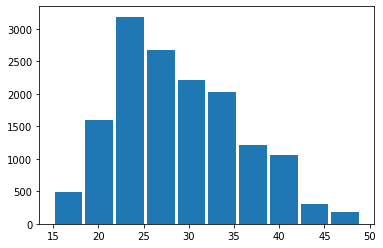

In [ ]:
# histogram of V012 variable

plt.hist(df['V012'], bins=10, histtype='bar', rwidth=0.9);

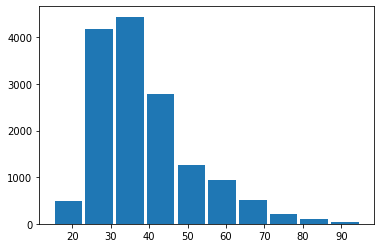

In [ ]:
# histogram of V152 variable

plt.hist(df['V152'], bins=10, histtype='bar', rwidth=0.9);

What have you noticed about the skewness of the two variables?

In [ ]:
Both variables are right skewed

In [ ]:
# displaying the frequency table of the V024 variable

df['V024'].value_counts()

Rift Valley      4760
Eastern          2299
Nyanza           2085
Coast            1857
Western          1398
Central          1197
North Eastern     925
Nairobi           428
Name: V024, dtype: int64

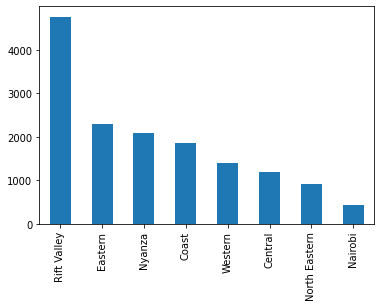

In [ ]:
# plotting the bar chart of the V024 frequency table

df['V024'].value_counts().plot(kind='bar')

In [ ]:
# displaying the frequency table of the V106 variable

df['V106'].value_counts()

Primary         7843
Secondary       3210
No education    2790
Higher          1106
Name: V106, dtype: int64

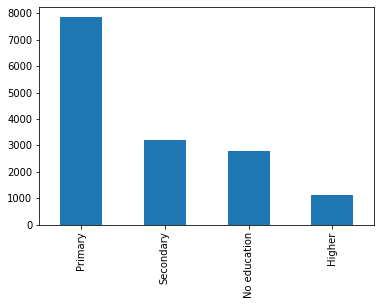

In [ ]:
# plotting the bar chart of the V106 frequency table

df['V106'].value_counts().plot(kind='bar')

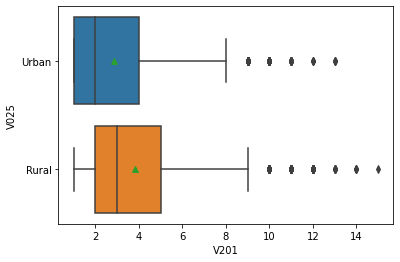

In [ ]:
# plotting a boxplot of V201 by V025

sns.boxplot(x = df['V201'],y=df['V025'], showmeans=True);

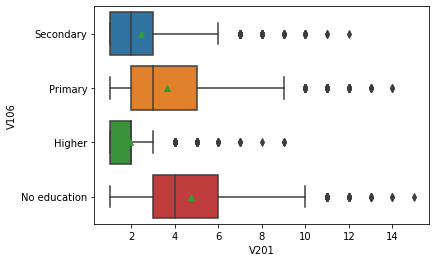

In [ ]:
# plotting a boxplot of V201 by V106

sns.boxplot(x = df['V201'],y=df['V106'], showmeans=True);

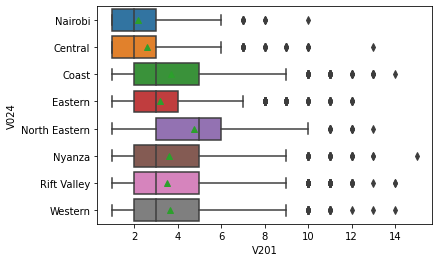

In [ ]:
# plotting a boxplot of V201 by V024

sns.boxplot(x = df['V201'],y=df['V024'], showmeans=True);

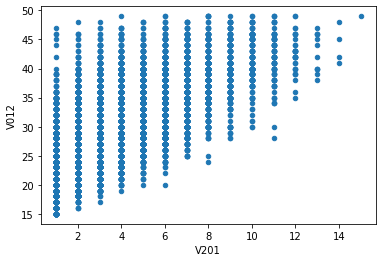

In [ ]:
# scatter plot of V201 by V012

df.plot.scatter( x='V201',y='V012')
plt.show()

In [ ]:
# previewing the correlation between the V201 and the V012 variables

pearson_coeff = df['V201'].corr(df['V012'], method="pearson") 
pearson_coeff

0.7104720955348267

What have you noticed about the relationship between the V201 and V012 variables based on the scatter plot and the Pearson Correlation Coefficient?

In [ ]:
there is a positive correlation between the two variables

## <font color='#2F4F4F'>3. Summary of Findings</font>

- What do the histograms tell you about the ages of the respondents and od the Household Heads?Both of the variables are positively skewed
- Which region has the most number of respondents? Which region has the least?riftvalley has the highest,nairobi has the least
- Which level of education has been attained by majority of the respondents? Which has been attained by the minority?maority have attained primary school education,minority have a higher education than secondary
- Which type of residency are more children born in: rural or urban?rural
- Which education level are more children born to?no education
- Which region leads in terms of total children born? Which region is the last?north eastern leads while nairobi is last
- Are more children born to younger women or older women?
younger women